# $${\color{red} {Devoir \: maison \: n^1 : Intervalles \: de\:  confiance\:  et\: méthodes\:  gloutonnes}}$$ 
# $$William\: BENHAIM$$

In [1]:
# On ajoute toutes les librairies utiles
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import statsmodels.datasets as smd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import DataFrame, Series
from statsmodels import datasets
from matplotlib import rc
from numpy import *
from pylab import *
from sklearn import linear_model, preprocessing, utils
from scipy.stats import t
from sklearn.linear_model.base import LinearModel, _pre_fit
from sklearn.base import RegressorMixin
from sklearn.linear_model import OrthogonalMatchingPursuit


In [2]:
%matplotlib inline


In [3]:
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)
plt.close("all")

sns.set_context("poster")
sns.set_palette("colorblind")
sns.axes_style()
sns.set_style({'legend.frameon': True})
color_blind_list = sns.color_palette("colorblind", 8)
my_orange = color_blind_list[2]
my_green = color_blind_list[1]


In [4]:
# Fonction qui permettra la mise en forme des resultats
# dans les differentes questions
# Mise en forme
AllRows = ['Intercept', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day']
ExplanatoryRows = ['Solar.R', 'Wind', 'Temp', 'Month', 'Day']


def MiseEnForme(ArrayA, ArrayB, NameColumn, NameIndex):
    Result = pd.Series(ArrayA).append(pd.Series(ArrayB))
    Result_DF = pd.DataFrame(Result, columns=[NameColumn])
    Result_DF.index = NameIndex
    return Result_DF


## $\color{red}{Exercice\:1:\:(Intervalle\:de\:confiance\:dans\:le\:modèle\:gaussien)}$

### Question 1:
#### Écrire mathématiquement le modèle linéaire correspondant

Le modéle s'écrit:
$$y_i=\theta_0^*+\sum_{i=1}^{n}\theta_i^*x_{ij}+\varepsilon_i$$
$$pour\: \: \: \:  \varepsilon_i  \overset{iid}{\sim} \varepsilon \: \: \: \:  et\: \: \: \:\varepsilon \sim  N(0_n,{\sigma}^2Id)     \: \: \: \:     \forall {i=1 \:  à\:  n} $$

### Question 2:
#### Récupérer le jeu de données à partir du package statsmodels.datasets.        On pourra utiliser la fonction get_rdataset de ce package avec la méthode data.

In [5]:
# On importe les donnees dans la variable data_gross
data_gross = smd.get_rdataset("airquality").data
data_gross.head(7)


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190,7.4,67,5,1
1,36,118,8.0,72,5,2
2,12,149,12.6,74,5,3
3,18,313,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28,NaN,14.9,66,5,6
6,23,299,8.6,65,5,7


### Question 3:
#### Enlever les lignes qui contiennent des valeurs manquantes.

In [6]:
# Nettoyage des donnees puis stockage dans data_clean
# par exemple les lignes 4 et 5 de data_gross sont supprimees
data_clean = data_gross.dropna()
data_clean.head(7)


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190,7.4,67,5,1
1,36,118,8.0,72,5,2
2,12,149,12.6,74,5,3
3,18,313,11.5,62,5,4
6,23,299,8.6,65,5,7
7,19,99,13.8,59,5,8
8,8,19,20.1,61,5,9


### Question 4:
#### Ajuster le modèle par la méthode des moindres carrés (avec sklearn ou statsmodels),en régressant la variable 'Ozonne' sur les cinq autres variables. 
        

In [7]:
Ozone_y = data_clean['Ozone']
# Selection de toutes les colonnes sauf la colonne Ozone
Explanatory_x = data_clean.drop(['Ozone'], axis=1)
# Scaling des donnees grace a 'preprocessing.scale'
Explanatory_x_scaled = preprocessing.scale(Explanatory_x)
regr_toOzone = linear_model.LinearRegression(normalize=True)
regr_toOzone.fit(Explanatory_x_scaled, Ozone_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

### Question 5:
#### Calculer l’estimateur des moindres carrés des coefficients du modèle (ainsi que de l’ordonnée à l’origine) ?

In [8]:
regr_toOzone_Coef = regr_toOzone.coef_
regr_toOzone_Intercept = regr_toOzone.intercept_
regr_toOzone_Coef_series = pd.Series(regr_toOzone_Coef)

prediction_toOzone = regr_toOzone.predict(
    Explanatory_x_scaled)
residus_toOzone = Ozone_y - prediction_toOzone

# Affichage
regr_toOzone_Result_DF = MiseEnForme(
    regr_toOzone_Intercept, regr_toOzone_Coef, 'coefficients', AllRows)
regr_toOzone_Result_DF.head(6)


,coefficients
Intercept,42.099099
Solar.R,4.561931
Wind,-11.752771
Temp,17.985220
Month,-4.458953
Day,2.373939


#### Donner l’expression théorique d’un estimateur sans biais de la variance du bruit, puis  le résultat numérique obtenu.

On note $ \widehat{\sigma }^2$, l'expression d’un estimateur sans biais de la variance du bruit. On obtient:

$$ \widehat{\sigma }^2=\frac{1}{n-rg(X)}\left \| y-X \widehat{\theta } \right \|_2^2$$

In [9]:
# Avec la formule du cours, calcul de l'Estimateur sans biais de la Variance
norm_residus_toOzone = linalg.norm(residus_toOzone)
Explanatory_x_scaled_initial = Explanatory_x_scaled
Explanatory_x_scaled = sm.add_constant(Explanatory_x_scaled)
rank_Explanatory_x_scaled = np.linalg.matrix_rank(Explanatory_x_scaled)
Var_Hat = 1 / (len(Ozone_y) * 1.0 - rank_Explanatory_x_scaled) *\
    (norm_residus_toOzone * norm_residus_toOzone)

Var_Hat_DataFrame = pd.DataFrame([Var_Hat], index=[
        'Estimateur sans biais de la Variance'], columns=['Resultat'])
Var_Hat_DataFrame.head()


,Resultat
Estimateur sans biais de la Variance,435.075495


### Question 6:
#### Proposer des intervalles de confiance pour chacun des coefficients   ${\theta}_j^*$   .
    

$$ IC_j = \left [ \widehat{\theta_j}-t_{j-{\alpha/2}}\widehat{\sigma}\sqrt{(X^TX)^-1_{j,j}},\widehat{\theta_j}+t_{j-{\alpha/2}}\widehat{\sigma}\sqrt{(X^TX)^-1_{j,j}} \right ] $$

#### Calculer les numériquement pour toutes les variables explicatives.

In [10]:
alpha = 0.01
#  Calcul intermediaire de (X^T*X)^-1
MatrixCalcul_inv_XtransX = inv(
    np.dot(Explanatory_x_scaled.transpose(), Explanatory_x_scaled))

# Utilisation de t.ppf pour trouver le quantile a 99% d'une loi d'une student
# Nb: Utilisation de n-p-1 si on n'ajoute pas la colonne de 1
stud = t.ppf(1 - alpha / 2, len(Explanatory_x_scaled) * 1.0 -
             np.linalg.matrix_rank(Explanatory_x_scaled))

# Creation d'une Array avec Intercept et les coefficients
all_theta = pd.Series(regr_toOzone_Intercept).append(pd.Series(
        regr_toOzone_Coef))
all_theta.index = [0, 1, 2, 3, 4, 5]


def IntervalCalcul(indice):
    ICInf = all_theta[indice] \
        - stud * sqrt(Var_Hat) * sqrt(MatrixCalcul_inv_XtransX[indice][indice])
    ICSup = all_theta[indice] \
        + stud * sqrt(Var_Hat) * sqrt(MatrixCalcul_inv_XtransX[indice][indice])
    return ICInf, ICSup

AllColumns = ['Intercept', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day']
ListIC = []
for i in range(0, 6):
    ICInf, ICSup = IntervalCalcul(i)
    ListIC.append(([ICInf, ICSup]))

ListIC_DF = pd.DataFrame(ListIC, columns=[
    'Borne Inferieure', 'Borne Superieure'])
ListIC_DF.index = AllColumns
ListIC_DF.head(6)


,Borne Inferieure,Borne Superieure
Intercept,36.905168,47.293030
Solar.R,-1.012992,10.136853
Wind,-17.741167,-5.764375
Temp,11.168540,24.801900
Month,-10.282812,1.364907
Day,-2.848751,7.596628


### Question 7:
#### Que pouvez-vous en déduire sur la pertinence des variables 'Day' et 'Month' (considérées séparément) ?

On remarque que 0 appartient à l'intervalle de confiance à 99% de 'Day' et 'Month'.
On a donc une confiance de 99% sur le fait que 0 appartienne à ces intervalles.
Or, si l'estimateur des moindres carrés d'un coefficient du modéle a pour valeur 0, cela veut dire que le coefficient en question ne permet pas d'expliquer le modéle.
On peut donc en déduire que, potentiellement, ces deux variables peuvent ne pas du tout expliquer la concentration en ozone.

On remarque également que 0 appartient à l'intervalle de confiance de la variable 'Solar.R'. 'Solar.R' est donc dans un cas similaire.

Il faut cependant relativiser nos résultats par le faible nombre d'observation à notre disposition (seulement 4 mois). En effet, lors de fortes températures, la concentration d'ozone augmente. Le jour du mois n'a donc, en effet, aucune incidence, mais le mois de l'année est corréllé à la température et aurait surement une importance plus forte avec un jeu de données plus important. 

### Question 8:
#### On enregistre une nouvelle observation (Solar.R=197, Wind=10, Temp=70, Day=1, Month=3). Quelle est la prévision du modèle concernant la concentration en ozone ?

In [11]:
X_new = np.array([197., 10., 70., 3., 1.])
X_new_scaled = (X_new-mean(Explanatory_x))/std(Explanatory_x)
prediction_Ozone = regr_toOzone.predict(X_new_scaled)
prediction_Ozone_DataFrame = pd.DataFrame([prediction_Ozone], index=[
    'Prediction Variable Ozone'], columns=['Resultat'])
prediction_Ozone_DataFrame.head()


,Resultat
Prediction Variable Ozone,36.462338


## ${\color{red} {Exercice\:2\:(Intervalle\:de\:confiance\:et\:bootstrap)}}$

### Question 1:
#### Calculer les estimateurs des coefficients obtenus par une moyenne, puis par une médiane sur les échantillons bootstrap.

In [12]:
# Definition d'une fonction Bootstrap qui permet de faire 
# varier le nombre d'operations a effectuer.


def Bootstrap(NbBoostrap):
    regr_toOzone_BS_Coef = []
    regr_toOzone_BS_Intercept = []
    for i in range(0, NbBoostrap):
        data_sample = utils.resample(data_clean)
        Ozone_y_BS = data_sample['Ozone']
        # On selectionne toutes les colonnes sauf la colonne Ozone
        Explanatory_x_BS = data_sample.drop(['Ozone'], axis=1)
        Explanatory_x_BS_scaled = preprocessing.scale(
            Explanatory_x_BS)
        regr_toOzone_BS = regr_toOzone.fit(Explanatory_x_BS_scaled, Ozone_y_BS)
        regr_toOzone_BS_Coef.append(regr_toOzone_BS.coef_)
        regr_toOzone_BS_Intercept.append(regr_toOzone_BS.intercept_)
    return regr_toOzone_BS_Coef, regr_toOzone_BS_Intercept


In [13]:
NbBoostrap = 10000

regr_toOzone_BS_Coef,\
    regr_toOzone_BS_Intercept = Bootstrap(NbBoostrap)
    
regr_toOzone_BS_Coef_DF = pd.DataFrame(regr_toOzone_BS_Coef,
                                       columns=ExplanatoryRows)
mean_regr_toOzone_BS_Coef = mean(regr_toOzone_BS_Coef_DF)
mean_regr_toOzone_BS_Intercept = mean(regr_toOzone_BS_Intercept)
median_regr_toOzone_BS_Coef = (regr_toOzone_BS_Coef_DF).median()
median_regr_toOzone_BS_Intercept = median(regr_toOzone_BS_Intercept)


In [14]:
# Mise en forme
regr_toOzone_BS_Mean_Result_DF = MiseEnForme(
    mean_regr_toOzone_BS_Intercept, mean_regr_toOzone_BS_Coef,
    'Moyenne des coefficents avec Bootstrap', AllRows)
# Affichage
regr_toOzone_BS_Mean_Result_DF.head(6)


,Moyenne des coefficents avec Bootstrap
Intercept,42.151787
Solar.R,4.576620
Wind,-11.814591
Temp,17.909470
Month,-4.422848
Day,2.341864


In [15]:
# Mise en forme
regr_toOzone_BS_Median_Result_DF = MiseEnForme(
    median_regr_toOzone_BS_Intercept, median_regr_toOzone_BS_Coef,
    'Mediane des coefficents avec Bootstrap', AllRows)
# Affichage
regr_toOzone_BS_Median_Result_DF.head(6)


,Mediane des coefficents avec Bootstrap
Intercept,42.126126
Solar.R,4.546428
Wind,-11.683607
Temp,17.932869
Month,-4.415282
Day,2.311763


#### Comparer les avec ceux obtenus avec la méthode de régression classique.

In [16]:
# Affichage
regr_toOzone_Result_DF.columns = [
    'Coefficients avec la methode de la regression classique']
regr_toOzone_Result_DF.head(6)


,Coefficients avec la methode de la regression classique
Intercept,42.099099
Solar.R,4.561931
Wind,-11.752771
Temp,17.985220
Month,-4.458953
Day,2.373939


On remarque que la moyenne et la médiane des résultats, obtenues par la méthode du Bootstrap sont légérement inférieures à nos résultats obtenus avec la méthode classique. 

### Question 2:
#### Calculer un intervalle de confiance de niveau 99%, en utilisant les quantiles empiriques de niveau 99.5% et 0.5% des échantillons bootstrap.

In [17]:
def IC_BootStrap(NameColumn, level):
    if NameColumn == 'Intercept':
        regr = pd.DataFrame(regr_toOzone_BS_Intercept, columns=['Intercept'])
    else:
        regr = pd.DataFrame(regr_toOzone_BS_Coef, columns=NameColumns)
    regr_sort = regr.sort_values([NameColumn])
    # Recuperation de la taille de l'echantillon Bootstrap dans la variable NB
    NbBS = shape(regr_sort)[0]

    LevelQuantileInf = int((level / 100.0) * NbBS)

    LevelQuantileSup = int(((100.0 - level) / 100.0) * NbBS)
    regr_Array = np.array(regr_sort[NameColumn])
    return regr_Array[LevelQuantileInf],\
        regr_Array[LevelQuantileSup]

NameColumns = ['Solar.R', 'Wind', 'Temp', 'Month', 'Day']
ListIC_BS = []

for column in AllColumns:
    ICInf_BS, ICSup_BS = IC_BootStrap(column, .5)
    ListIC_BS.append(([ICInf_BS, ICSup_BS]))

ListIC_BS_DF = pd.DataFrame(ListIC_BS, columns=[
    'Borne Inferieure avec BootStrap', 'Borne Superieure avec BootStrap'])
ListIC_BS_DF.index = AllColumns
ListIC_BS_DF.head(6)


,Borne Inferieure avec BootStrap,Borne Superieure avec BootStrap
Intercept,34.630631,50.756757
Solar.R,0.065077,9.395224
Wind,-20.074366,-4.958885
Temp,11.983273,23.936841
Month,-9.500324,0.666816
Day,-3.173168,7.684612


### Question 3:
#### Afficher sur un graphe les deux courbes (en pointillés noirs) donnant les bornes inférieures et supérieures (des intervalles de confiance) pour la variable 'Wind', et ce en fonction du paramètre B. On ajoutera en trait plein la courbe des estimés par la médiane bootstrap de ce même coefficient. On fera varier B de 1 à 5001 par saut de 500.

In [18]:
icInf_BS_Wind_Array = []
icSup_BS_Wind_Array = []
median_BS_Wind = []
for STEP_ in arange(1, 5002, 500):
    # On met volontairement les mêmes noms de variable que
    # precedement pour utiliser IC_BootStrap
    regr_toOzone_BS_Coef, \
        regr_toOzone_BS_Intercept = Bootstrap(STEP_)
    regr_toOzone_BS_Coef_DF = \
        pd.DataFrame(regr_toOzone_BS_Coef, columns=NameColumns)

    median_regr_toOzone_BS_Coef = \
        (regr_toOzone_BS_Coef_DF)['Wind'].median()
    # Le pas est recupere automatiquement dans la fonction IC_Bootstrap
    icInf_BS_Wind, icSup_BS_Wind = IC_BootStrap('Wind', 0.5)
    median_BS_Wind.append(median_regr_toOzone_BS_Coef)

    icInf_BS_Wind_Array.append(icInf_BS_Wind)
    icSup_BS_Wind_Array.append(icSup_BS_Wind)


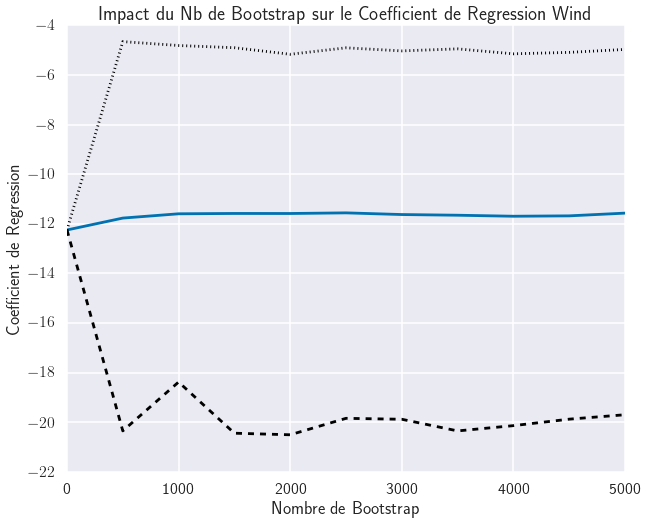

In [19]:
xlabels = 'Nombre de Bootstrap'
ylabels = 'Coefficient de Regression'
fig, ax = plt.subplots(figsize=(10, 8))
labels = arange(0, 6000, 1000)
plt.xlabel(xlabels)
plt.ylabel(ylabels)
ax.set_xticklabels(labels)
plt.title('Impact du Nb de Bootstrap sur le Coefficient de Regression Wind')
plt.plot(median_BS_Wind, label="Mediane de Wind")
plt.plot(icInf_BS_Wind_Array, label="Borne Inferieure de l'IC de Wind",
         color='black', linestyle="--")
plt.plot(icSup_BS_Wind_Array, label="Borne Superieure de l'IC de Wind",
         color='black', linestyle=":")


### Question 4:
#### Afficher sur un seul graphique les points et les droites de régression correspondant à faire une régression de la variable 'Ozone' sur 'Wind' mois par mois. Quel mois semble atypique ?

/Users/williambenhaim/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


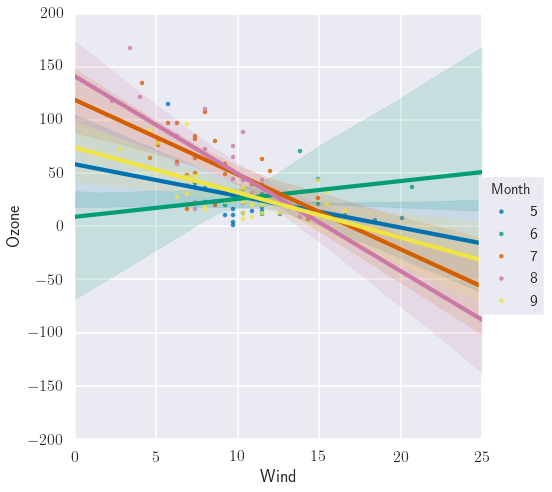

In [20]:
sns.lmplot(x="Wind", y="Ozone", hue="Month", data=data_clean, size=7)


#### Quel mois semble atypique ?

Le mois de juin (mois '6' en vert dans le graphe) semble atypique. En effet, alors que tous les autres mois ont une courbe décroissante, le mois de juin a une courbe croissante.

## ${\color{red} {Exercice\:3\:(Algorithmes\:gloutons\:ou\:greedy)}}$

### Question 1:
#### Écrivez une fonction stpforward qui prend comme argument : les observations Y , la matrice X, et enfin un paramètre M qui est le nombre maximum de variables sélectionnées. En sortie, la fonction doit renvoyer la listes S des indices des variables sélectionnées et le vecteur ${\theta} \: \epsilon  \: \mathbb{R}^p$ (dont les coordonnées sont nulles sauf les  ${\theta}_j^*$ pour  ${j} \: \epsilon  \: S$) correspondant à l’estimation des moindres carrés effectuée seulement sur les variables dont les indices sont dans S.

In [21]:
def stpforward(Obs_Y, Mat_X_scaled, Param_M):
    # Creation des variables
    r = Obs_Y
    S = []
    # theta est le resultat de la fonction
    theta = np.zeros([Mat_X_scaled.shape[1], ])
    for i in range(Param_M):
        theta_int = []
        # Le complementaire de S
        S_c = list(filter(lambda x: x not in S, range(Mat_X_scaled.shape[1])))
        alpha = []
        for j in S_c:
            alpha.append(abs(np.dot(Mat_X_scaled[:, j], r)))
        # indice du max des alpha
        j_max = np.argmax(alpha)
        S.append(S_c[j_max])
        Mat_Xs = pd.DataFrame([])
        for indice in S:
            Mat_Xs_int = pd.DataFrame(Mat_X_scaled[:, indice])
            Mat_Xs = pd.concat([Mat_Xs, Mat_Xs_int[0]], axis=1)
        Regr = linear_model.LinearRegression(normalize=True)
        Regr.fit(Mat_Xs, Obs_Y)
        Regr_coef = Regr.coef_
        theta_int = Regr_coef
        Regr_intercept = Regr.intercept_
        r = Obs_Y-np.dot(Mat_Xs, theta_int)
    theta[S] = theta_int
    return theta

# Test de la fonction avec les donnees des questions precedentes
print stpforward(Ozone_y, Explanatory_x_scaled_initial, 5)


[  4.56193076 -11.75277084  17.98521995  -4.45895297   2.37393859]


### Question 2:
#### Créer une classe MYOMP qui implémente stpforward, en partant de l’exemple proposé ci- dessous.

In [22]:
class MYOMP(LinearModel, RegressorMixin):

    def __init__(self, n_nonzero_coefs=None, fit_intercept=True, normalize=True, precompute='auto'):
        self.n_nonzero_coefs = n_nonzero_coefs
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.precompute = precompute

    def fit(self, X, y, Param_M):
        """Fit the model using X, y as training data.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
        Training data.
        y : array-like, shape (n_samples,) or (n_samples, n_targets)
        Target values.
        Returns
        -------
        self : object
        returns an instance of self.
        """
        X, y, X_mean, y_mean, X_std, Gram, Xy = _pre_fit(
            X, y, None, self.precompute, self.normalize, self.fit_intercept, copy=True)
        self.coef_ = stpforward(y, X, Param_M)
        self._set_intercept(X_mean, y_mean, X_std)
        return self


In [23]:
regr_MYOMP_test = MYOMP()
regr_MYOMP_test.fit(Explanatory_x_scaled_initial, Ozone_y, 5)
regr_MYOMP_test_coef = regr_MYOMP_test.coef_
regr_MYOMP_test_Intercept = regr_MYOMP_test.intercept_
print 'coef:', regr_MYOMP_test_coef
print 'intercept:', regr_MYOMP_test_Intercept


coef: [  4.56193076 -11.75277084  17.98521995  -4.45895297   2.37393859]
intercept: 42.0990990991


### Question 3:
#### Appliquer MYOMP au jeu de données airquality, pour M = 3, 4, 5.

In [24]:
for M in range(3, 6):
    regr_MYOMP = MYOMP()
    regr_MYOMP.fit(Explanatory_x_scaled_initial, Ozone_y, M)
    regr_MYOMP_coef = regr_MYOMP.coef_
    regr_MYOMP_Intercept = regr_MYOMP.intercept_
    print 'coef:', regr_MYOMP_coef
    print 'intercept:', regr_MYOMP_Intercept


coef: [  5.42816683 -11.80641781  15.67331326   0.           0.        ]
intercept: 42.0990990991
coef: [  4.50045463 -11.74591966  17.7488752   -4.38806519   0.        ]
intercept: 42.0990990991
coef: [  4.56193076 -11.75277084  17.98521995  -4.45895297   2.37393859]
intercept: 42.0990990991


### Question 4:
#### Comparer votre sortie avec celle de OrthogonalMatchingPursuit de sklearn.

In [25]:
for M in range(3, 6):
    regr_OMP = sklearn.linear_model.OrthogonalMatchingPursuit(
        n_nonzero_coefs=M)
    regr_OMP.fit(Explanatory_x_scaled_initial, Ozone_y)
    regr_OMP_coef = regr_OMP.coef_
    regr_OMP_Intercept = regr_OMP.intercept_
    print 'coef:', regr_OMP_coef
    print 'intercept:', regr_OMP_Intercept

    

coef: [  5.42816683 -11.80641781  15.67331326   0.           0.        ]
intercept: 42.0990990991
coef: [  4.50045463 -11.74591966  17.7488752   -4.38806519   0.        ]
intercept: 42.0990990991
coef: [  4.56193076 -11.75277084  17.98521995  -4.45895297   2.37393859]
intercept: 42.0990990991


Les résultats que nous obtenons par les deux methodes sont strictement identiques, ce qui valide l'algorithme réalisé dans la question 1.
De plus, 'Day' et 'Month' sont les premiére variables à être supprimées de notre algorithme, ce sont donc les variables qui expliquent le moins bien la concentration en ozone. Ceci confirme donc bien les résultats obtenus dans l'exercice 1 et valide donc la réponse à la question 7 de l'exercice 1. 
En executant une nouvelle fois l'algorithme, Scolar.R serait également supprimer, comme anticipé précédement.